In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Transport Vehicles
df = pd.read_csv("vehicles.csv")
df.head(5)

,Category (Col. 1),States/Uts (Col. 2),Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3),Transport - Light Motor Vehicle (Goods) (Col. 4),Transport - Buses (Col. 5),Transport - Taxis (Col. 6),Transport - Light Motor Vehicle (Passenger) (Col. 7),Non-Transport - Two Wheelers (Col. 9),Non-Transport - Cars (Col. 10),Non-Transport - Jeeps (Col. 11),Non-Transport - Omni Buses (Col. 12),Non-Transport - Tractors (Col. 13),Non-Transport - Trailers (Col. 14),Non-Transport - Others (Col. 15),Non-Transport - Total Non Transport (Col. 16)
0,STATE,Andhra Pradesh,145466.0,167612.0,38269.0,73324.0,397126.0,6147523.0,454054.0,10878.0,21875.0,126862.0,93155.0,13929.0,6868276.0
1,STATE,Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STATE,Assam,133617.0,109792.0,19846.0,53859.0,91936.0,1520260.0,508135.0,16128.0,1555.0,35082.0,19527.0,0.0,2100687.0
3,STATE,Bihar,91823.0,31921.0,29384.0,85119.0,202385.0,3489796.0,235762.0,113377.0,NaN,315048.0,157877.0,25104.0,4336964.0
4,STATE,Chhattisgarh,110629.0,76331.0,52783.0,20960.0,33100.0,3471643.0,226044.0,20251.0,6112.0,171648.0,107423.0,17003.0,4020124.0


In [3]:
# Find the total number of non-transport vehicles in Karnataka
n_t = df.loc[df['States/Uts (Col. 2)'] == 'Karnataka']
n_t['non_transport_total'] = n_t['Non-Transport - Two Wheelers (Col. 9)'] + n_t['Non-Transport - Cars (Col. 10)'] + n_t['Non-Transport - Jeeps (Col. 11)'] + n_t['Non-Transport - Omni Buses (Col. 12)'] + n_t['Non-Transport - Tractors (Col. 13)'] + n_t['Non-Transport - Trailers (Col. 14)']+ n_t['Non-Transport - Others (Col. 15)']
n_t[['States/Uts (Col. 2)','non_transport_total']]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,States/Uts (Col. 2),non_transport_total
11,Karnataka,13380335.0


In [4]:
# Find the State / UT which has max number of Buses

t_bus = df[['States/Uts (Col. 2)','Transport - Buses (Col. 5)', 'Non-Transport - Omni Buses (Col. 12)']]
t_bus['total_bus'] = t_bus['Transport - Buses (Col. 5)'] + t_bus['Non-Transport - Omni Buses (Col. 12)']
top_bus =t_bus.sort_values("total_bus", ascending = False)
top_bus = top_bus.set_index('States/Uts (Col. 2)')
top_bus = top_bus.drop(['GRAND TOTAL','TOTAL STATES'])
top_bus.head(1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Transport - Buses (Col. 5),Non-Transport - Omni Buses (Col. 12),total_bus
States/Uts (Col. 2),,,
Kerala,414748.0,3872.0,418620.0


In [5]:
# Find the State / UT which has min number of two wheelers
min_t = df[['States/Uts (Col. 2)','Non-Transport - Two Wheelers (Col. 9)']]
min_t = min_t.set_index('States/Uts (Col. 2)')
min_t = min_t.drop(['GRAND TOTAL','TOTAL STATES','TOTAL Uts'])
min_t = min_t.sort_values('Non-Transport - Two Wheelers (Col. 9)')
min_t.head(1)

,Non-Transport - Two Wheelers (Col. 9)
States/Uts (Col. 2),
Sikkim,3633.0


In [13]:
# Find the State / UT which has max number of vehicles (transport + non transport)

gt = df.set_index('States/Uts (Col. 2)')
gt = gt.drop(['GRAND TOTAL','TOTAL STATES','TOTAL Uts'])

gt['grand_total'] = gt['Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3)']+gt['Transport - Light Motor Vehicle (Goods) (Col. 4)']+gt['Transport - Buses (Col. 5)']+ gt['Transport - Taxis (Col. 6)']+gt['Transport - Light Motor Vehicle (Passenger) (Col. 7)']+gt['Non-Transport - Two Wheelers (Col. 9)']+gt['Non-Transport - Cars (Col. 10)']+gt['Non-Transport - Jeeps (Col. 11)']+gt['Non-Transport - Omni Buses (Col. 12)']+gt['Non-Transport - Tractors (Col. 13)']+gt['Non-Transport - Trailers (Col. 14)']+gt['Non-Transport - Others (Col. 15)']
gt = gt.sort_values('grand_total', ascending = False)
gt = gt.reset_index()
#gt = gt[['States/Uts (Col. 2)','grand_total']]
top_state = gt.head(1)[['States/Uts (Col. 2)','grand_total']]
top_state

,States/Uts (Col. 2),grand_total
0,Maharashtra,25562175.0


In [14]:
# Find the State / UT which has max number of Trucks
truck = df[['States/Uts (Col. 2)','Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3)']]
truck = truck.set_index('States/Uts (Col. 2)')
truck = truck.drop(['GRAND TOTAL','TOTAL STATES','TOTAL Uts'])
truck = truck.sort_values('Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3)', ascending = False)
truck.head(1)

,Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3)
States/Uts (Col. 2),
Tamil Nadu,526485.0


Enter state:Karnataka


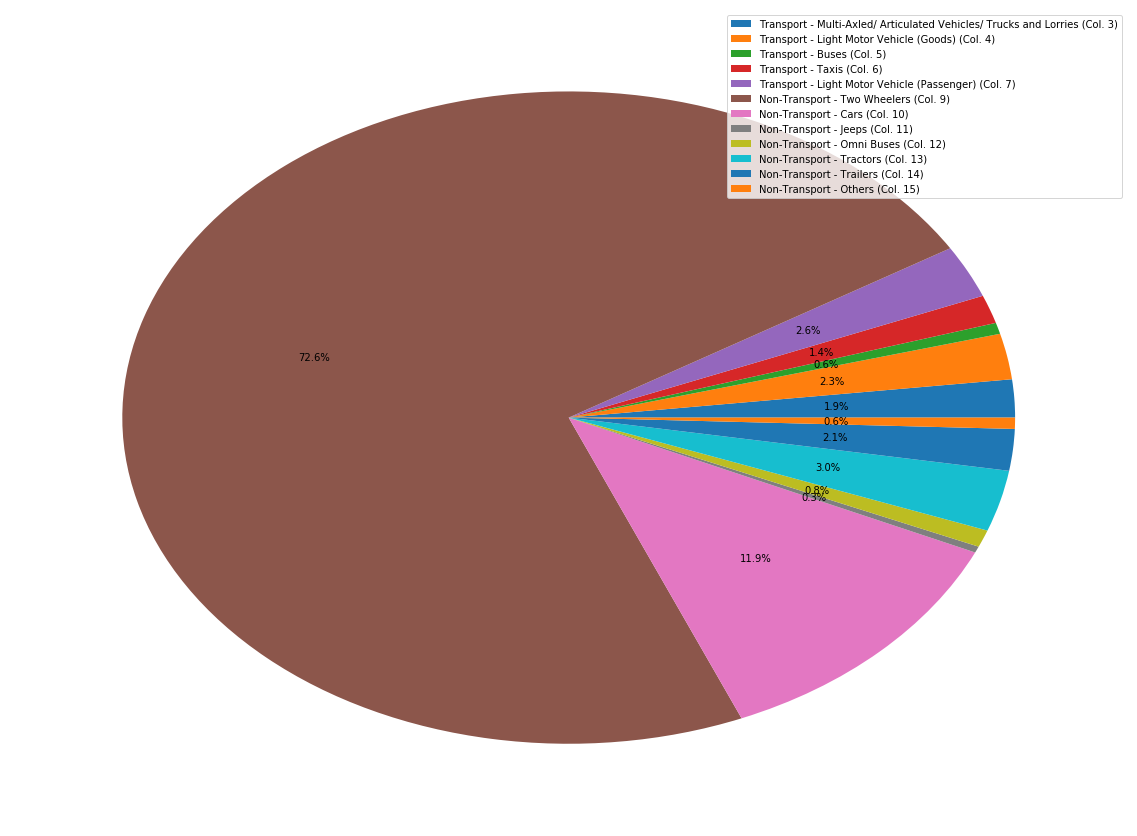

In [15]:
# Visualizations:
# Draw pie chart to show the percentages and number of different types of vehicles in the given state.

def perc(state):
    
    plt.figure(figsize=(20, 15))
    st = df.drop(df.columns[[-1]], axis=1) 
    st = st.set_index('States/Uts (Col. 2)')
    st = st.loc[state]
    st = pd.DataFrame({'category':st.index, 'numbers':st.values})
    st = st.drop([0])
    
    st_data = list(st.numbers)
    st_names = list(st.category)
    labels = st_names
    plt.pie(st_data, autopct= '%1.1f%%')
    plt.legend(labels,loc = 'best')
    plt.show()
    
s=input("Enter state:")
perc(s)
    




D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


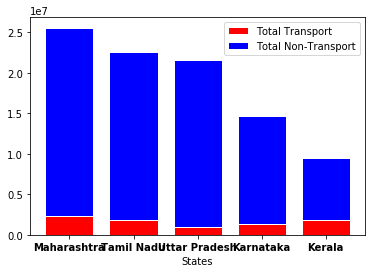

,States/Uts (Col. 2),total-transport,Non-Transport - Total Non Transport (Col. 16)
0,Maharashtra,2339973.0,23222202.0
1,Tamil Nadu,1827887.0,20690782.0
2,Uttar Pradesh,914352.0,20721178.0
3,Karnataka,1273227.0,13380335.0
4,Kerala,1795842.0,7735928.0


In [17]:
# Draw stacked bar chart for top 5 states which has max number of vehicles.
top_5 = gt.head(5)
top_5.iloc[:,2:7]
top_5['total-transport'] = np.sum(top_5.iloc[:,2:7], axis = 1)
#top_5['total-Non-transport'] = np.sum(top_5.iloc[:,7:15],axis = 1)
top_5 = top_5.iloc[:,[0,-1,-3]]



data1= list(top_5['total-transport'])
data2 = list(top_5['Non-Transport - Total Non Transport (Col. 16)'])
names = list(top_5['States/Uts (Col. 2)'])

r = [0,1,2,3,4]
barWidth = 0.75

plt.bar(r, data1, color='red', edgecolor='white', width=barWidth, label = 'Total Transport')
plt.bar(r, data2, bottom=data1, color='blue', edgecolor='white', width=barWidth, label = 'Total Non-Transport')

plt.xticks(r, names, fontweight='bold')
plt.xlabel("States")

plt.legend()
plt.show()
top_5

In [19]:
# #PIE for top 5 states which has max number of vehicles.
# data = list(top_5.grand_total)
# labels = list(top_5['States/Uts (Col. 2)'])
# colors = ['red','blue','green','yellow','black']
# explode = (0.1,0,0,0,0)
# plt.pie(data, labels = labels, explode = explode, shadow = True, colors = colors, autopct = '%1.1f%%' )
# plt.tight_layout()
# plt.show()